In [ ]:
# Frank Ohme
# for the PHAROS PhD School, March 2019 Jena, Germany
# slightly modified from the original notebook GWTC-1_sample_release.ipynb

# Sample release for GWTC-1

This notebook serves as a basic introduction to loading and viewing data released in associaton with the publication titled __Observations of Compact Binary Mergers by Advanced LIGO and Advanced Virgo during the First and Second Observing Runs__ avaliable through [DCC](https://dcc.ligo.org/LIGO-P1800307/public) and [arXiv](https://arxiv.org/).

 The data used in these tutorials will be downloaded from the public DCC page [LIGO-P1800370](https://dcc.ligo.org/LIGO-P1800370/public).

For this notebook we'll use `h5py` to read the data files, `numpy` and `pandas` for general data manipulation as well as `matplotlib` and`seaborn` for plotting.

In [1]:
%matplotlib inline
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

There are 10 Binary Black Hole observations contained in this data release

In [2]:
# BBHs = ['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729',  'GW170809', 'GW170814', 'GW170818', 'GW170823']

In [2]:
BBH = h5py.File('GW151226_GWTC-1.hdf5', 'r')
# In this example, I only downloaded the data file for GW151226. 
# You will need it, too, to run this notebook (see link above).

In [3]:
print('This file contains four datasets: ',BBH.keys())

This file contains four datasets:  <KeysViewHDF5 ['IMRPhenomPv2_posterior', 'Overall_posterior', 'SEOBNRv3_posterior', 'prior']>


This data file contains several datasets, two using separate models for the gravitaional waveform (`IMRPhenomPv2` and `SEOBNRv3` respectively, see the [paper](https://dcc.ligo.org/LIGO-P1800307) for more details). 

It also contiains a joint dataset, combining equal numbers of samples from each individual model, these datasets are what is shown in the [paper](https://dcc.ligo.org/LIGO-P1800307). 

Finally, there is a dataset containing samples drawn from the prior used for the analyses.

In [4]:
BBH['Overall_posterior'].dtype

dtype([('costheta_jn', '<f8'), ('luminosity_distance_Mpc', '<f8'), ('right_ascension', '<f8'), ('declination', '<f8'), ('m1_detector_frame_Msun', '<f8'), ('m2_detector_frame_Msun', '<f8'), ('spin1', '<f8'), ('spin2', '<f8'), ('costilt1', '<f8'), ('costilt2', '<f8')])

Here are some brief descriptions of these parameters and their uses:

 * `luminosity_distance_Mpc`: luminosity distance [Mpc]

 * `m1_detector_frame_Msun`: primary (larger) black hole mass (detector frame) [solar mass]

 * `m2_detector_frame_Msun`: secondary (smaller) black hole mass (detector frame) [solar mass]

 * `right_ascension`, `declination`: right ascension and declination of the source [rad].

 * `costheta_jn`: cosine of the angle between line of sight and total angular momentum vector of system.

 * `spin1`, `costilt1`: primary (larger) black hole spin magnitude (dimensionless) and cosine of the zenith angle between the spin and the orbital angular momentum vector of system.

 * `spin2`, `costilt2`: secondary (smaller) black hole spin magnitude (dimensionless) and cosine of the zenith angle between the spin and the orbital angular momentum vector of system.
   


As an example, we'll show the four different dsitributions for the `luminosity distance` parameter.

In [5]:
pd = BBH['Overall_posterior']

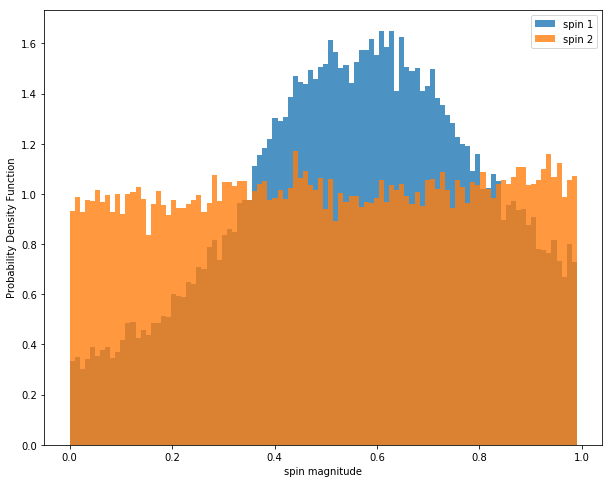

In [6]:
# Let's look at the inferred spins 
plt.figure(figsize=[10, 8])
plt.hist(pd['spin1'], bins = 100, label = 'spin 1', alpha=0.8, density = True)
plt.hist(pd['spin2'], bins = 100, label = 'spin 2', alpha=0.8, density = True)
plt.xlabel(r'spin magnitude')
plt.ylabel('Probability Density Function')
plt.legend()
plt.show()

In [17]:
# chi_eff is not one of the parameters provided in the data file.
# Let's construct it from the information we have.
chieff = (pd['spin1'] * pd['costilt1'] * pd['m1_detector_frame_Msun'] + \
pd['spin2'] * pd['costilt2'] * pd['m2_detector_frame_Msun']) / \
(pd['m1_detector_frame_Msun'] + pd['m2_detector_frame_Msun'])

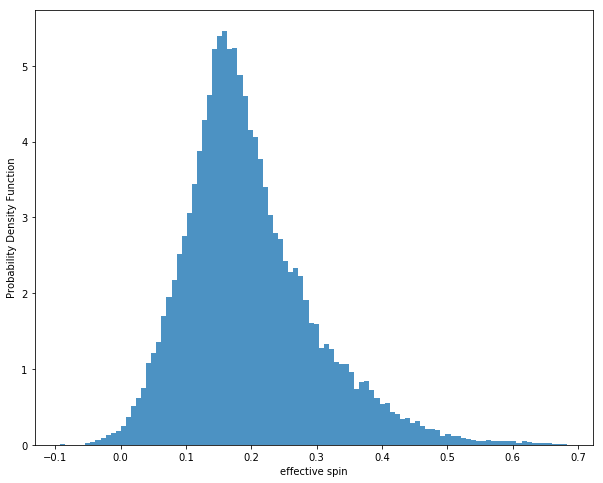

In [20]:
plt.figure(figsize=[10, 8])
plt.hist(chieff, bins = 100, alpha=0.8, density = True)
plt.xlabel(r'effective spin')
plt.ylabel('Probability Density Function')
plt.show()

In [ ]:
# What can we say about the individual spin magnitudes, if we don't care 
# which of the two inspiralling black holes we are talking about.  
# 
# I.e., what is the probability that at least one of the black holes had a 
# spin of greater than X?

In [8]:
spinvalues = np.arange(0., 1., 0.1)

# Probabilities are simple the number of samples (entries in the data tables) with the desired
# properties, divided by the number of all samples.

# Below, we calculate 1 - P(spin1 < s AND spin2 < s)
probabilities = [1 - np.sum(np.logical_and(BBH['Overall_posterior']['spin1'] < s, BBH['Overall_posterior']['spin2'] < s)) \
/ BBH['Overall_posterior']['spin1'].size for s in spinvalues]

# Let's do the same for the prior distribution
prior = [1 - np.sum(np.logical_and(BBH['prior']['spin1'] < s, BBH['prior']['spin2'] < s)) \
/ BBH['prior']['spin1'].size for s in spinvalues]

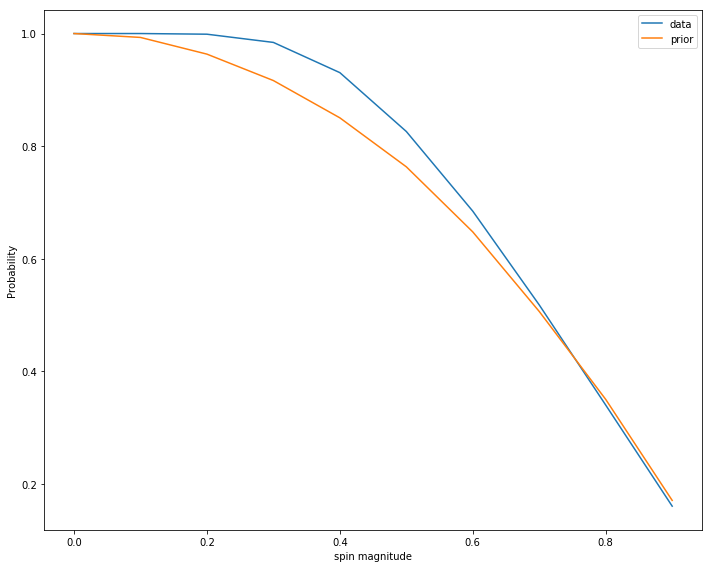

In [9]:
plt.figure(figsize=[10, 8])
plt.plot(spinvalues, probabilities, label='data')
plt.plot(spinvalues, prior, label='prior')
plt.xlabel('spin magnitude')
plt.ylabel('Probability')
plt.legend()
plt.tight_layout()

In [10]:
print('In particular, there is a {:.1f}% chance that at least one black hole is spinning \
with magnitude of {:.1f} or more.'.format(probabilities[2] * 100., spinvalues[2]))

In particular, there is a 99.9% chance that at least one black hole is spinning with magnitude of 0.2 or more.
